In [221]:
from google.colab import files
uploaded = files.upload()

Saving airlines.csv to airlines (1).csv


In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
airlines = pd.read_csv("airlines.csv")
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [224]:
# A bit moree information of our dataset.
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2477 non-null   int64  
 1   id             2477 non-null   int64  
 2   day            2477 non-null   object 
 3   airline        2477 non-null   object 
 4   destination    2477 non-null   object 
 5   dest_region    2477 non-null   object 
 6   dest_size      2477 non-null   object 
 7   boarding_area  2477 non-null   object 
 8   dept_time      2477 non-null   object 
 9   wait_min       2477 non-null   float64
 10  cleanliness    2477 non-null   object 
 11  safety         2477 non-null   object 
 12  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 251.7+ KB


We've 2477 entries, One row per each fight.<br> It seems we have no missingness.

# ***Data cleaning.***

"Unnamed: 0" and "id" columns does not contain usefulm or even certain information. So, we'll drop those columns for memory space reasons.

In [225]:
airlines.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

Get the unique values of 'cleanliness', 'safety', 'satisfaction', 'dest_region', 'dest_size' columns.

In [226]:
columns=['cleanliness', 'safety', 'satisfaction', 'dest_region', 'dest_size']
for col in columns:
  print(col , "\n", "Number of categories= ", airlines['cleanliness'].nunique() ,"\n", airlines[col].unique(), "\n")

cleanliness 
 Number of categories=  5 
 ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

safety 
 Number of categories=  5 
 ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

satisfaction 
 Number of categories=  5 
 ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 

dest_region 
 Number of categories=  5 
 ['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 

dest_size 
 Number of categories=  5 
 ['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     '] 



##### 1- The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.

In [227]:
airlines['dest_region'] = airlines['dest_region'].str.lower() 

Verify changes have been effected

In [228]:
airlines['dest_region'].value_counts()

west us                  864
east us                  436
europe                   272
midwest us               251
asia                     226
canada/mexico            198
eur                       79
middle east               69
australia/new zealand     60
central/south america     22
Name: dest_region, dtype: int64

In [229]:
sns.set(font_scale=1.5, rc={"figure.figsize":(8,6)})
sns.set_style("ticks")

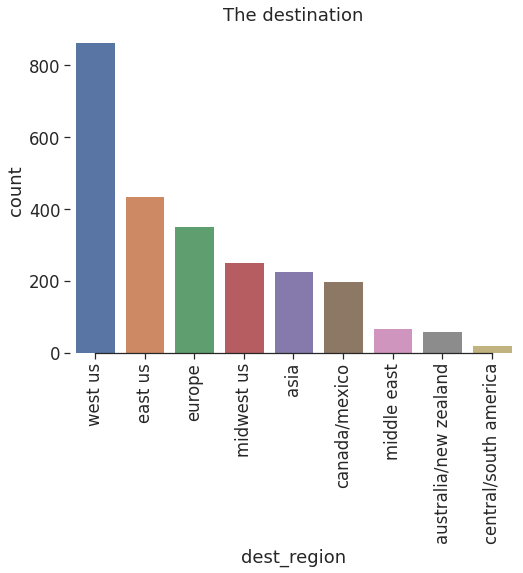

In [254]:
sns.countplot(data=airlines, x='dest_region', order=airlines['dest_region'].value_counts().index)
sns.despine(trim=True, left=True)
plt.xticks(rotation=90)
plt.title("The destination")
plt.show()

##### 2- The dest_size column has only inconsistent values due to leading and trailing spaces.

In [231]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
airlines['dest_size'] = airlines['dest_size'].str.strip()

Verify changes have been effected

In [232]:
airlines['dest_size'].value_counts()

Hub       1550
Medium     600
Small      200
Large      127
Name: dest_size, dtype: int64

For better intution, let's visualize it.

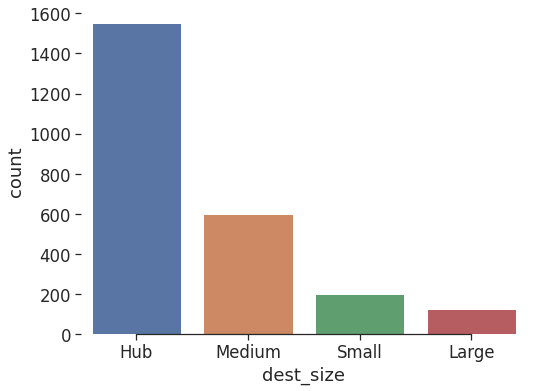

In [233]:
sns.countplot(data=airlines, x='dest_size', order=airlines['dest_size'].value_counts().index)
sns.despine(trim=True, left=True)
plt.show()

Remove "Gates" from boarding_area column

In [234]:
airlines["boarding_area"]= airlines["boarding_area"].str.strip("Gates")
airlines["boarding_area"].value_counts()

 1-12      609
 91-102    474
 50-59     467
 70-90     383
 20-39     225
 40-48     176
 60-69     143
Name: boarding_area, dtype: int64

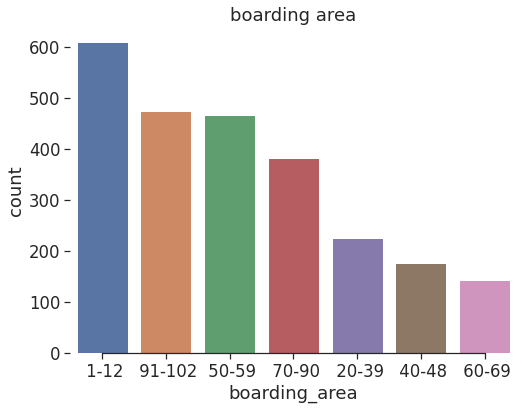

In [255]:
sns.countplot(data=airlines, x="boarding_area", order=airlines["boarding_area"].value_counts().index)
sns.despine(trim=True, left=True)
plt.title("boarding area")
plt.show()

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate.<br> To make your analysis easier, we'll create two new categorical variables:<br>
***wait_type:***
<br> 'short' for 0-60 min, 'medium' for 60-180 and long for 180+.<br>
***day_week:*** 
<br>'weekday' if day is in the weekday, 'weekend' if day is in the weekend.


But first Let's find out more about waiting time, and display the distribution of it.

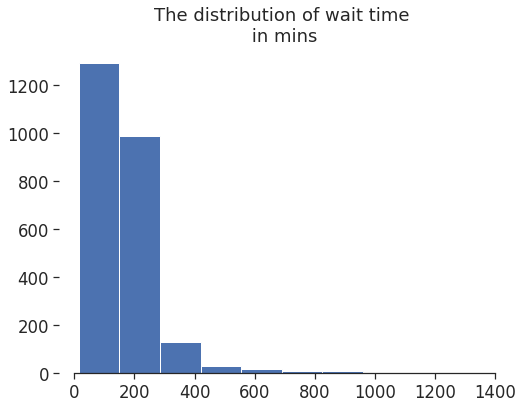

In [256]:
plt.hist(airlines["wait_min"])
sns.despine(trim=True, left=True)
plt.title("The distribution of wait time\n in mins")
plt.show()

As we can observe, The distribution is ***right skewed***, which means that we have more number of passengers who waited for a long time than who waited for short time.

In [237]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                               labels = label_names)

Now, it's days turn.

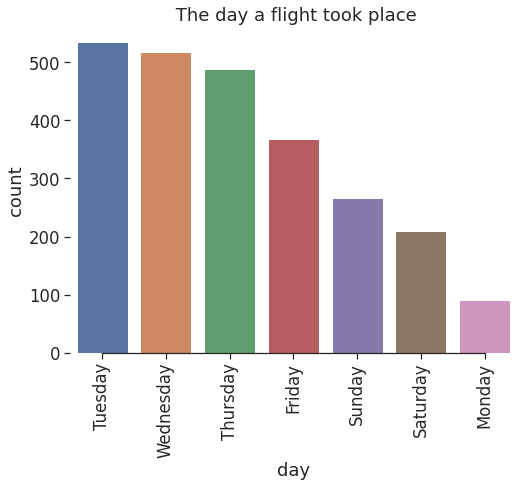

In [257]:
sns.countplot(data=airlines, x="day", order=airlines["day"].value_counts().index)
plt.xticks(rotation=90)
sns.despine(trim=True, left=True)
plt.title(" The day a flight took place")
plt.show()

In [239]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis.
<br> Let's look at the new form of our dataframe.

In [240]:
airlines.head()

,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,Tuesday,UNITED INTL,KANSAI,asia,Hub,91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,Thursday,DELTA,LOS ANGELES,west us,Hub,40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,Wednesday,AMERICAN,MIAMI,east us,Hub,50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


Extract the year from dept_time column and crerate new feature

In [241]:
airlines["dept_time"]= pd.to_datetime(airlines["dept_time"])
airlines["year"]= airlines["dept_time"].dt.year

In [242]:
airlines["year"].nunique()

1

Well, the flights in our dataset occurred in 2018. So, the year column that we have just created does not cotain any useful information. So, we'll drop it again. <br> First let's look at dept_time column.



In [243]:
airlines["dept_time"].nunique()

2

Well, Just tow days have been recorded. we will drop "dept_time" column too.



In [244]:
airlines.drop(["year", "dept_time"], axis=1, inplace=True)

# ***Exploratory data analysis.***
<h2 align='center'> Now, We're ready to begin our Analysis ☺ </h2>

### ***Are waiting-type rates affected by the day of travel ?***

In [245]:
pd.DataFrame(airlines.groupby(by=["day_week"]).wait_type.value_counts(normalize=True)* 100)

wait_type
day_week                  
weekday  medium  69.450000
         long    26.850000
         short    3.700000
weekend  medium  67.505241
         long    31.027254
         short    1.467505

### ***Are satisfaction rates affected by waiting time ?***

In [246]:
wait_satis= pd.DataFrame(airlines.groupby(by=["wait_type"]).satisfaction.value_counts(normalize=True)* 100)
round(wait_satis, 1)

satisfaction
wait_type satisfaction                      
short     Somewhat satsified            60.5
          Very satisfied                21.0
          Neutral                       17.3
          Very unsatisfied               1.2
medium    Somewhat satsified            54.5
          Very satisfied                24.3
          Neutral                       19.6
          Somewhat unsatisfied           1.6
          Very unsatisfied               0.1
long      Somewhat satsified            53.7
          Very satisfied                23.9
          Neutral                       20.0
          Somewhat unsatisfied           2.2
          Very unsatisfied               0.1

Let's convert this table into a nicer looking chart.

In [247]:
def display_percentage(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 5
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 14, weight="bold")

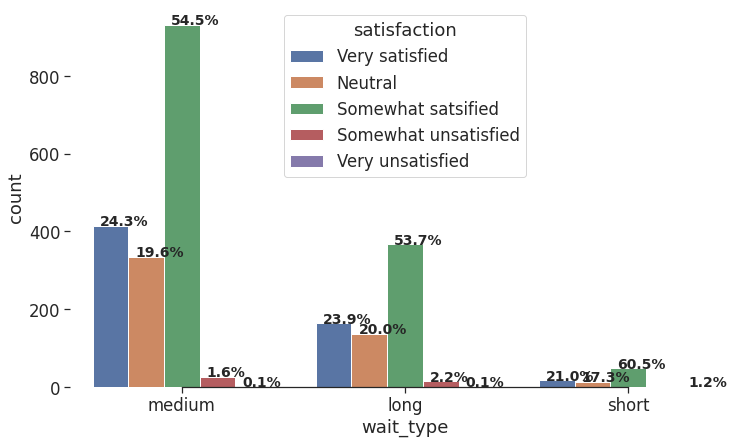

In [248]:
plt.figure(figsize=(12, 7))
ax= sns.countplot(data= airlines, x="wait_type", hue="satisfaction", order=airlines["wait_type"].value_counts().index)
sns.despine(trim=True, left=True)
display_percentage(ax, airlines["wait_type"], 3, 5)
plt.show()

cleanliness and satisfication.

In [250]:
clean_satis= pd.DataFrame((airlines.groupby(by=["cleanliness"]).satisfaction.value_counts(normalize=True)* 100).unstack()).replace(np.nan, "not exists")
round(clean_satis, 1)

satisfaction,Neutral,Somewhat satsified,Somewhat unsatisfied,Very satisfied,Very unsatisfied
cleanliness,,,,,
Average,48.8,40.874036,6.426735,3.341902,0.514139
Clean,6.2,41.581921,0.225989,51.864407,0.112994
Dirty,50.0,not exists,not exists,not exists,50.0
Somewhat clean,19.1,69.531915,0.851064,10.553191,not exists
Somewhat dirty,61.5,19.230769,19.230769,not exists,not exists


We also note from the table that the satisfaction rates of passengers distinguish and vary according to the degree of cleanliness, as the dissatisfaction increased completely with the passengers who registered completely unclean, and vice versa.
<br> Not: not exist means we don't have samples recorded with these values.
<br> For better intution let's visualize it.

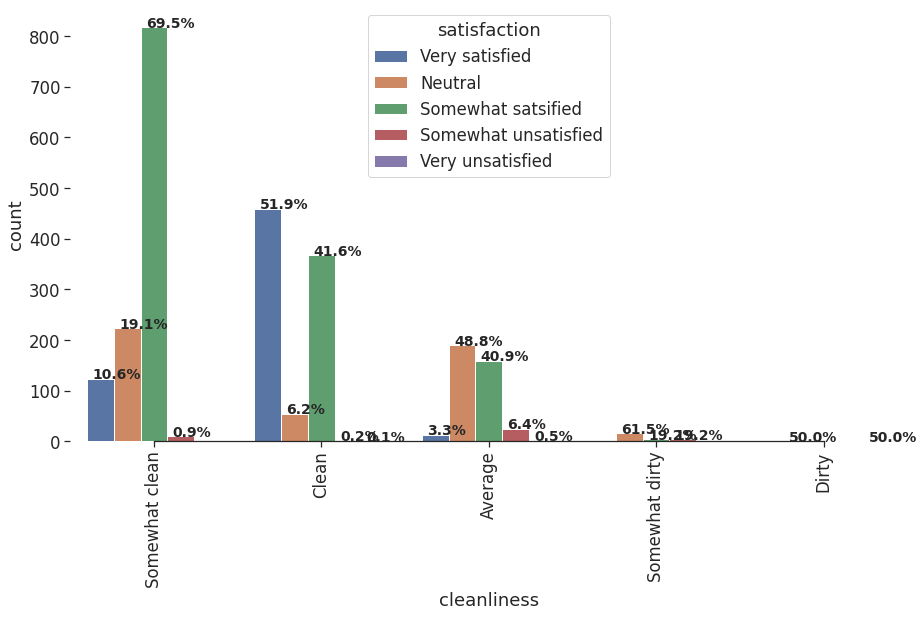

In [251]:
plt.figure(figsize=(15, 8))
ax= sns.countplot(data=airlines, x="cleanliness", hue="satisfaction", order=airlines["cleanliness"].value_counts().index)
display_percentage(ax, airlines["cleanliness"], 5, 5)
sns.despine(trim=True, left=True)
plt.xticks(rotation=90)
plt.show()